In [1]:
import sqlite3
import pandas as pd

# Create (or connect to) the SQLite database file
conn = sqlite3.connect("micro_project_01.db")
cursor = conn.cursor()

print("Connected to micro_project_01.db")

Connected to micro_project_01.db


In [2]:
schema_sql = """
DROP TABLE IF EXISTS applications;
DROP TABLE IF EXISTS shifts;
DROP TABLE IF EXISTS nurses;
DROP TABLE IF EXISTS facilities;

CREATE TABLE nurses (
    nurse_id     INTEGER PRIMARY KEY,
    name         TEXT NOT NULL,
    specialty    TEXT NOT NULL,
    city         TEXT NOT NULL,
    rating       REAL
);

CREATE TABLE facilities (
    facility_id  INTEGER PRIMARY KEY,
    name         TEXT NOT NULL,
    city         TEXT NOT NULL,
    type         TEXT NOT NULL
);

CREATE TABLE shifts (
    shift_id     INTEGER PRIMARY KEY,
    facility_id  INTEGER NOT NULL,
    specialty    TEXT NOT NULL,
    shift_date   TEXT NOT NULL,
    start_time   TEXT NOT NULL,
    end_time     TEXT NOT NULL,
    hourly_rate  REAL NOT NULL,
    status       TEXT NOT NULL,
    FOREIGN KEY (facility_id) REFERENCES facilities(facility_id)
);

CREATE TABLE applications (
    application_id INTEGER PRIMARY KEY,
    shift_id       INTEGER NOT NULL,
    nurse_id       INTEGER NOT NULL,
    applied_at     TEXT NOT NULL,
    status         TEXT NOT NULL,
    FOREIGN KEY (shift_id) REFERENCES shifts(shift_id),
    FOREIGN KEY (nurse_id) REFERENCES nurses(nurse_id)
);
"""

cursor.executescript(schema_sql)
conn.commit()

print("Tables created.")


Tables created.


In [3]:
# Insert sample data into nurses
nurses_data = [
    (1, "Alice Rivera",      "ICU",     "Austin", 4.7),
    (2, "Brian Matthews",    "ER",      "Austin", 4.3),
    (3, "Chloe Nguyen",      "General", "Dallas", 4.9),
    (4, "Daniel Ortiz",      "ICU",     "Houston", 4.2),
    (5, "Emma Johnson",      "General", "Houston", 4.6),
    (6, "Franklin Cole",     "ER",      "Dallas", 4.0)
]

cursor.executemany(
    "INSERT INTO nurses (nurse_id, name, specialty, city, rating) VALUES (?, ?, ?, ?, ?);",
    nurses_data
)

# Insert sample data into facilities
facilities_data = [
    (1, "Lone Star Medical Center", "Austin",  "hospital"),
    (2, "Greenfield Clinic",        "Austin",  "clinic"),
    (3, "North Dallas Hospital",    "Dallas",  "hospital"),
    (4, "Bayview Care Home",        "Houston", "nursing_home")
]

cursor.executemany(
    "INSERT INTO facilities (facility_id, name, city, type) VALUES (?, ?, ?, ?);",
    facilities_data
)

# Insert sample data into shifts
shifts_data = [
    # shift_id, facility_id, specialty, shift_date,   start_time, end_time, hourly_rate, status
    (1, 1, "ICU",     "2025-01-10", "07:00", "15:00", 60.0, "filled"),
    (2, 1, "ER",      "2025-01-10", "15:00", "23:00", 55.0, "filled"),
    (3, 2, "General", "2025-01-11", "08:00", "16:00", 45.0, "open"),
    (4, 3, "ICU",     "2025-01-11", "19:00", "07:00", 70.0, "filled"),
    (5, 3, "ER",      "2025-01-12", "07:00", "15:00", 52.0, "cancelled"),
    (6, 4, "General", "2025-01-12", "09:00", "17:00", 42.0, "filled"),
    (7, 4, "General", "2025-01-13", "09:00", "17:00", 40.0, "open"),
    (8, 2, "ER",      "2025-01-13", "15:00", "23:00", 58.0, "filled")
]

cursor.executemany(
    """
    INSERT INTO shifts 
    (shift_id, facility_id, specialty, shift_date, start_time, end_time, hourly_rate, status)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?);
    """,
    shifts_data
)

# Insert sample data into applications
applications_data = [
    # application_id, shift_id, nurse_id, applied_at,           status
    (1, 1, 1, "2025-01-08 10:15", "accepted"),
    (2, 1, 4, "2025-01-08 11:30", "rejected"),
    (3, 2, 2, "2025-01-09 09:00", "accepted"),
    (4, 2, 6, "2025-01-09 09:30", "rejected"),
    (5, 3, 3, "2025-01-09 14:00", "applied"),
    (6, 4, 1, "2025-01-10 20:00", "rejected"),
    (7, 4, 4, "2025-01-10 21:00", "accepted"),
    (8, 5, 2, "2025-01-10 12:00", "cancelled"),
    (9, 6, 3, "2025-01-11 10:30", "accepted"),
    (10, 7, 5, "2025-01-11 11:00", "applied"),
    (11, 8, 2, "2025-01-12 13:30", "accepted"),
    (12, 8, 6, "2025-01-12 14:00", "rejected")
]

cursor.executemany(
    """
    INSERT INTO applications
    (application_id, shift_id, nurse_id, applied_at, status)
    VALUES (?, ?, ?, ?, ?);
    """,
    applications_data
)

conn.commit()

print("Sample data inserted.")


Sample data inserted.


In [4]:
def show(query):
    return pd.read_sql_query(query, conn)


In [5]:
show("SELECT * FROM nurses;")


,nurse_id,name,specialty,city,rating
0,1,Alice Rivera,ICU,Austin,4.7
1,2,Brian Matthews,ER,Austin,4.3
2,3,Chloe Nguyen,General,Dallas,4.9
3,4,Daniel Ortiz,ICU,Houston,4.2
4,5,Emma Johnson,General,Houston,4.6
5,6,Franklin Cole,ER,Dallas,4.0


In [6]:
show("SELECT * FROM facilities;")


,facility_id,name,city,type
0,1,Lone Star Medical Center,Austin,hospital
1,2,Greenfield Clinic,Austin,clinic
2,3,North Dallas Hospital,Dallas,hospital
3,4,Bayview Care Home,Houston,nursing_home


In [7]:
show("SELECT * FROM shifts;")


,shift_id,facility_id,specialty,shift_date,start_time,end_time,hourly_rate,status
0,1,1,ICU,2025-01-10,07:00,15:00,60.0,filled
1,2,1,ER,2025-01-10,15:00,23:00,55.0,filled
2,3,2,General,2025-01-11,08:00,16:00,45.0,open
3,4,3,ICU,2025-01-11,19:00,07:00,70.0,filled
4,5,3,ER,2025-01-12,07:00,15:00,52.0,cancelled
5,6,4,General,2025-01-12,09:00,17:00,42.0,filled
6,7,4,General,2025-01-13,09:00,17:00,40.0,open
7,8,2,ER,2025-01-13,15:00,23:00,58.0,filled


In [8]:
show("SELECT * FROM applications;")


,application_id,shift_id,nurse_id,applied_at,status
0,1,1,1,2025-01-08 10:15,accepted
1,2,1,4,2025-01-08 11:30,rejected
2,3,2,2,2025-01-09 09:00,accepted
3,4,2,6,2025-01-09 09:30,rejected
4,5,3,3,2025-01-09 14:00,applied
5,6,4,1,2025-01-10 20:00,rejected
6,7,4,4,2025-01-10 21:00,accepted
7,8,5,2,2025-01-10 12:00,cancelled
8,9,6,3,2025-01-11 10:30,accepted
9,10,7,5,2025-01-11 11:00,applied


In [9]:
show("""
SELECT
    f.facility_id,
    f.name AS facility_name,
    f.city,
    COUNT(*) AS total_shifts,
    SUM(CASE WHEN s.status = 'filled' THEN 1 ELSE 0 END) AS filled_shifts,
    ROUND(
        1.0 * SUM(CASE WHEN s.status = 'filled' THEN 1 ELSE 0 END) / COUNT(*)
    , 2) AS fill_rate
FROM shifts s
JOIN facilities f ON s.facility_id = f.facility_id
GROUP BY f.facility_id, f.name, f.city
ORDER BY fill_rate ASC, total_shifts DESC;
""")


,facility_id,facility_name,city,total_shifts,filled_shifts,fill_rate
0,2,Greenfield Clinic,Austin,2,1,0.5
1,3,North Dallas Hospital,Dallas,2,1,0.5
2,4,Bayview Care Home,Houston,2,1,0.5
3,1,Lone Star Medical Center,Austin,2,2,1.0


In [10]:
show("""
SELECT
    s.specialty,
    COUNT(*) AS total_shifts,
    SUM(CASE WHEN s.status = 'filled' THEN 1 ELSE 0 END) AS filled_shifts,
    ROUND(
        1.0 * SUM(CASE WHEN s.status = 'filled' THEN 1 ELSE 0 END) / COUNT(*)
    , 2) AS fill_rate
FROM shifts s
GROUP BY s.specialty
ORDER BY fill_rate ASC, total_shifts DESC;
""")


,specialty,total_shifts,filled_shifts,fill_rate
0,General,3,1,0.33
1,ER,3,2,0.67
2,ICU,2,2,1.00


In [11]:
show("""
SELECT
    s.shift_id,
    s.specialty,
    s.shift_date,
    a.applied_at AS accepted_at,
    ROUND(JULIANDAY(s.shift_date) - JULIANDAY(a.applied_at), 2) AS days_before_shift
FROM shifts s
JOIN applications a 
    ON s.shift_id = a.shift_id
WHERE a.status = 'accepted'
ORDER BY days_before_shift DESC;
""")


,shift_id,specialty,shift_date,accepted_at,days_before_shift
0,1,ICU,2025-01-10,2025-01-08 10:15,1.57
1,2,ER,2025-01-10,2025-01-09 09:00,0.63
2,6,General,2025-01-12,2025-01-11 10:30,0.56
3,8,ER,2025-01-13,2025-01-12 13:30,0.44
4,4,ICU,2025-01-11,2025-01-10 21:00,0.13


In [12]:
show("""
SELECT
    s.shift_id,
    s.specialty,
    s.hourly_rate,
    ROUND(JULIANDAY(s.shift_date) - JULIANDAY(a.applied_at), 2) AS days_before_shift
FROM shifts s
JOIN applications a 
    ON s.shift_id = a.shift_id
WHERE a.status = 'accepted'
ORDER BY s.hourly_rate DESC;
""")


,shift_id,specialty,hourly_rate,days_before_shift
0,4,ICU,70.0,0.13
1,1,ICU,60.0,1.57
2,8,ER,58.0,0.44
3,2,ER,55.0,0.63
4,6,General,42.0,0.56


In [13]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt

facility_fill = show("""
SELECT
    f.name AS facility_name,
    COUNT(*) AS total_shifts,
    SUM(CASE WHEN s.status = 'filled' THEN 1 ELSE 0 END) AS filled_shifts,
    1.0 * SUM(CASE WHEN s.status = 'filled' THEN 1 ELSE 0 END) / COUNT(*) AS fill_rate
FROM shifts s
JOIN facilities f ON s.facility_id = f.facility_id
GROUP BY f.name
ORDER BY fill_rate ASC;
""")

facility_fill


,facility_name,total_shifts,filled_shifts,fill_rate
0,Bayview Care Home,2,1,0.5
1,Greenfield Clinic,2,1,0.5
2,North Dallas Hospital,2,1,0.5
3,Lone Star Medical Center,2,2,1.0


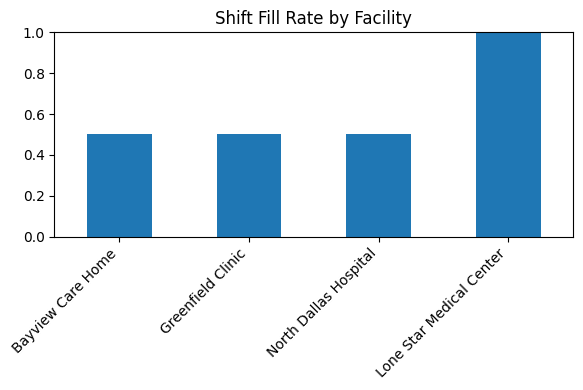

In [17]:
facility_fill_plot = facility_fill.set_index("facility_name")["fill_rate"]

plt.figure(figsize=(6, 4))
facility_fill_plot.plot(kind="bar")

# REMOVE the y-axis label
plt.ylabel("")

# REMOVE the x-axis label
plt.xlabel("")

# Keep the title
plt.title("Shift Fill Rate by Facility")

plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [19]:
specialty_fill = show("""
SELECT
    s.specialty,
    COUNT(*) AS total_shifts,
    SUM(CASE WHEN s.status = 'filled' THEN 1 ELSE 0 END) AS filled_shifts,
    1.0 * SUM(CASE WHEN s.status = 'filled' THEN 1 ELSE 0 END) / COUNT(*) AS fill_rate
FROM shifts s
GROUP BY s.specialty
ORDER BY fill_rate ASC;
""")

specialty_fill


,specialty,total_shifts,filled_shifts,fill_rate
0,General,3,1,0.333333
1,ER,3,2,0.666667
2,ICU,2,2,1.000000


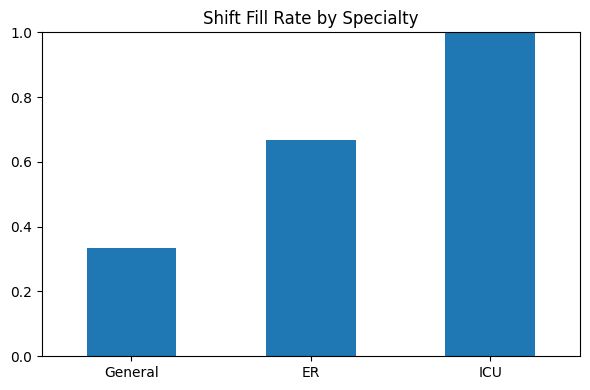

In [20]:
specialty_fill_plot = specialty_fill.set_index("specialty")["fill_rate"]

plt.figure(figsize=(6, 4))
specialty_fill_plot.plot(kind="bar")

# Remove axis labels
plt.ylabel("")
plt.xlabel("")

plt.title("Shift Fill Rate by Specialty")

plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
